# Task Image2Image

Image is generated with a prompt and an image as inputs. The input image is used as a starting point for the image generation process.

http://127.0.0.1:8888/tree?token=5afe2144c59f5a7f03ab6807411aaf36858d4b65801be552

## I. Text to image

In [1]:
import os, torch
from PIL import Image
from diffusers.utils import load_image, make_image_grid
from diffusers import AutoPipelineForImage2Image

os.environ["NCCL_P2P_DISABLE"] = "1"
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

2024-08-01 18:22:28.791089: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-01 18:22:28.791149: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-01 18:22:28.793621: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-01 18:22:28.804606: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-01 18:22:30.749049: W tensorflow/compiler/tf2

cuda


In [2]:

prompt = "clown in a big train station with people around, trains and buildings, realistic, detailed, 8k"

negative_prompt = "bad quality, low quality"

# image_url = "https://i.pinimg.com/736x/2d/b0/ff/2db0fff1d32c05645e5e51844b1de589.jpg"
# image_url = "https://www.cybergroupstudios.com/wp-content/uploads/2021/02/GGNT_SCREENSHOT_7-1024x576.jpg"
# image_url = "https://image.lexica.art/full_webp/ad079c18-56c2-4ad1-8683-3c0ec0a5052c"
image_url = "https://images.halloweencostumes.com/media/13/clown/moppie-clown-costume.jpg"
# image_url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/img2img-init.png"
# input_image = Image.open("~/Document/DL_pytorch/diffusers/dragon.jpg")

input_image = load_image(image_url)

generator = torch.Generator(device=device).manual_seed(42)

### stable diffusion 1 & 2

  0%|          | 0/40 [00:00<?, ?it/s]

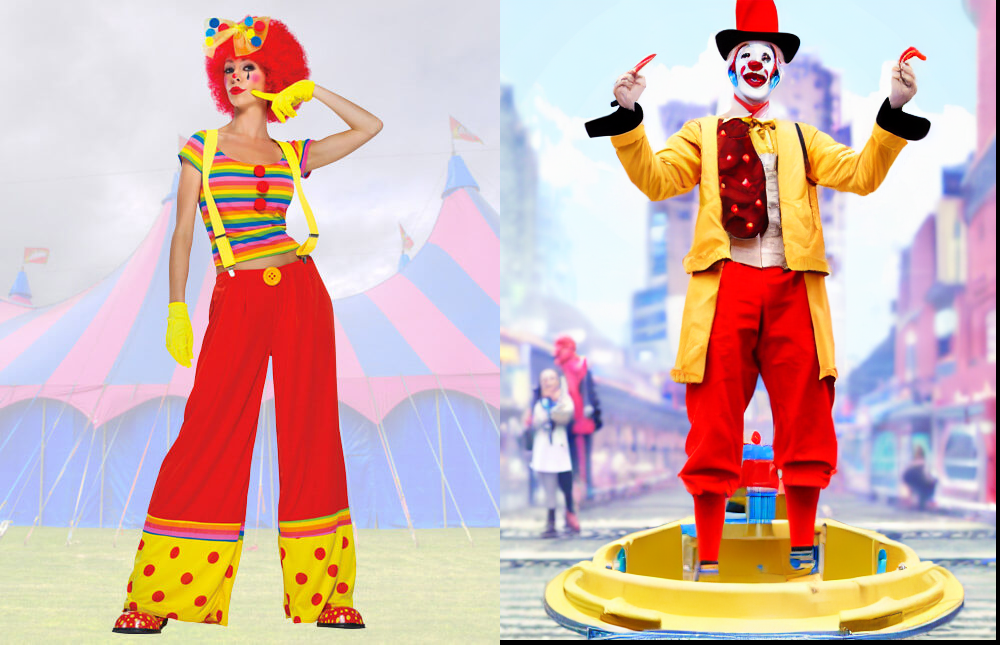

In [56]:
# stable diffusion v1.5
# "runwayml/stable-diffusion-v1-5"
# 
# "stabilityai/stable-diffusion-2-1"

# pipe_text2img = AutoPipelineForImage2Image.from_pretrained("runwayml/stable-diffusion-v1-5", use_safetensors=True, torch_dtype=torch.float16, variant="fp16",).to("cuda")

image = pipe_text2img(prompt, image=input_image, generator=generator).images[0]

make_image_grid([input_image, image], rows=1, cols=2)

### stable diffusion XL (SDXL)

  0%|          | 0/15 [00:00<?, ?it/s]

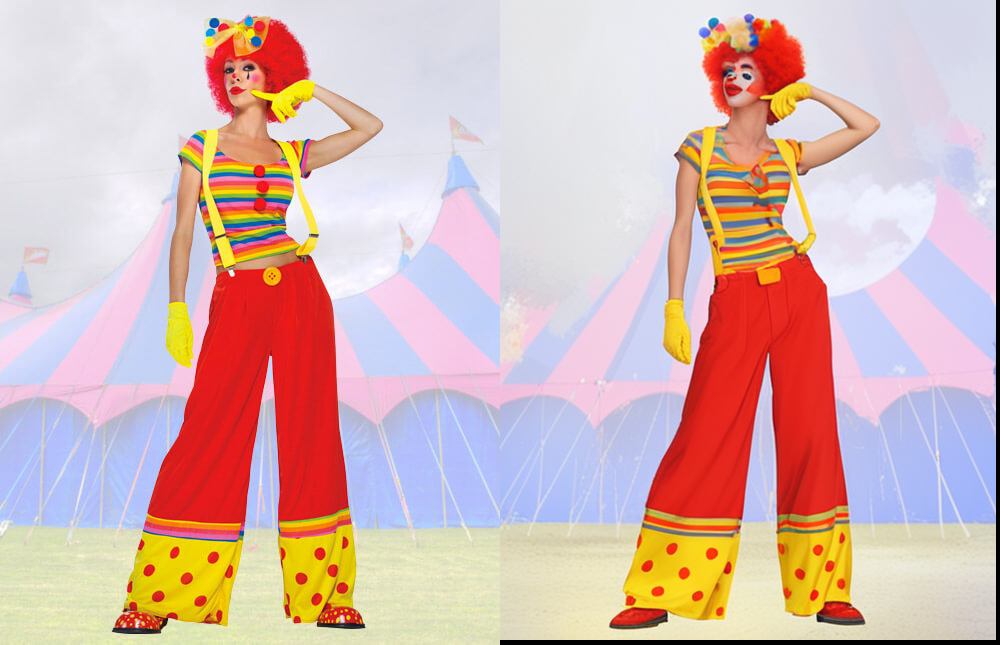

In [6]:
# https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0

# pipe_xl = AutoPipelineForImage2Image.from_pretrained("stabilityai/stable-diffusion-xl-refiner-1.0",
#                                                     use_safetensors=True, 
#                                                     torch_device=device,
#                                                     torch_dtype=torch.float16,
#                                                     variant="fp16"
#                                                     ).to("cuda")

image = pipe_xl(prompt, image=input_image, strenth=0.9, generator=generator)[0][0]

make_image_grid([input_image, image], rows=1, cols=2)

### Kandinsky

/home/Qingyi/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

/home/Qingyi/.local/lib/python3.10/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/home/Qingyi/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

/home/Qingyi/.local/lib/python3.10/site-packages/diffusers/pipelines/kandinsky2_2/pipeline_kandinsky2_2_img2img.py:276: FutureWarning: `callback_steps` is deprecated and will be removed in version 1.0.0. Passing `callback_steps` as an input argument to `__call__` is deprecated, consider use `callback_on_step_end`
  deprecate(


  0%|          | 0/30 [00:00<?, ?it/s]

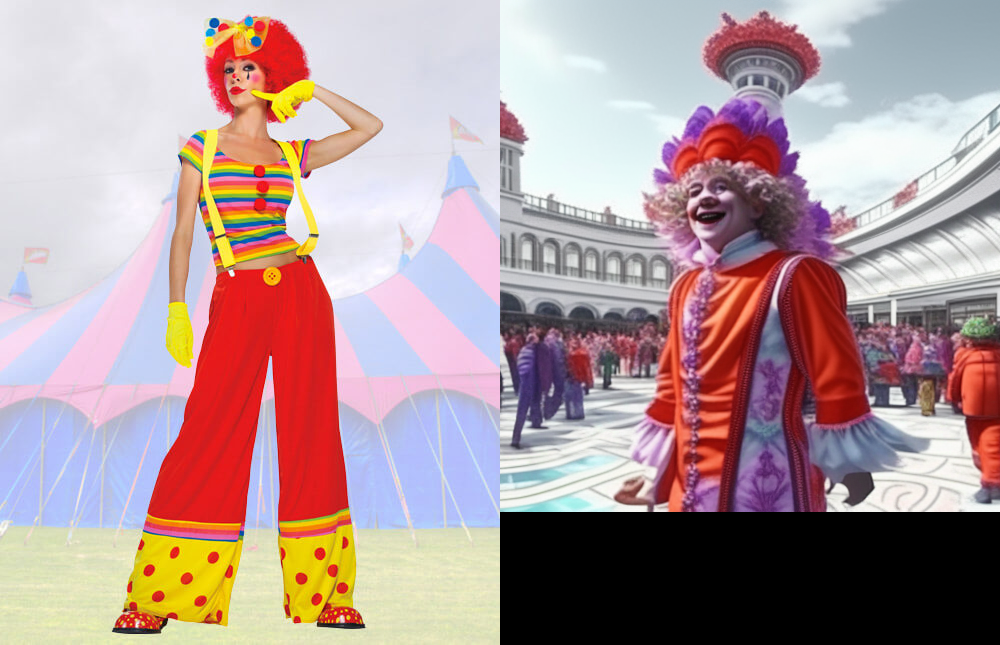

In [3]:
# https://huggingface.co/docs/diffusers/using-diffusers/kandinsky

pipe_kandinsky = AutoPipelineForImage2Image.from_pretrained("kandinsky-community/kandinsky-2-2-decoder", use_safetensors=True, torch_dtype=torch.float16).to("cuda")

image = pipe_kandinsky(prompt, 
                       negative_prompt=negative_prompt,
                       image=input_image,
                       generator=generator)[0][0]

make_image_grid([input_image, image], rows=1, cols=2)


### Stable Diffusion XL Turbo

  0%|          | 0/1 [00:00<?, ?it/s]

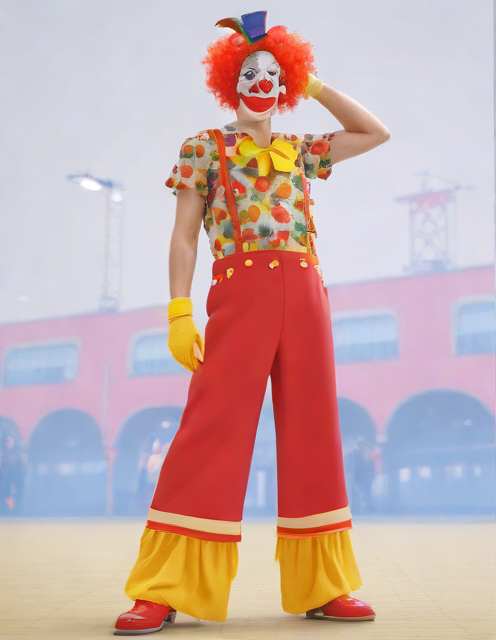

In [ ]:
# Stable Diffusion XL Turbo

# pipe_turbo = AutoPipelineForImage2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16", use_safetensors=True).to("cuda")

image = pipe_turbo(prompt, generator=generator, image=input_image, guidance_scale=0.0, num_inference_steps=2, strength=0.5).images[0]

make_image_grid([input_image, image], rows=1, cols=2)
